# Necessary Imports, Add imports here as required

In [112]:
import numpy as np
import pandas as pd
import requests
import json
import os
import collections
import random
from datetime import date
from heapq import nlargest
import kaggle as kg
import panel as pn
from panel.interact import interact
from dotenv import load_dotenv
from panel import widgets
import plotly.express as px
import hvplot.pandas
pn.extension("plotly")
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [113]:
#Instructor Notes
#1. What about other potentioal industries that they can expand on if other industries are set to perform poorly or die if there is a reduction impact
#2. What can be some of the positives that can be create dout of a reduction
#3. What doe si tmean for a potential growth point of view for ht ecountries that stand to lose from CO2 reduction policies
#4. Counteract the negatives of the loss with the positives of a gain in green house gas reductions and co2 reductions
#5. We will narrow to conutries that have the most impact 
#6. Look at th elife expectancy and the correlationw ith a reduction or increase in carbon emissions
#7. Look at regional impacts


# Kaggle Dataset Imports via our kaggle api

1. CO2 GHG Emissions Data
2. Greenhouse Gas Emissisons
3. Global CO2 Emissions
4. Climate Change: Earth Surface Temperature Data
5. Global Commodity Trade Statistics
6. World development indicators by country


## CO2 GHG EMISSIONS DATA

In [114]:
!kaggle datasets download -d yoannboyere/co2-ghg-emissionsdata


  0%|          | 0.00/147k [00:00<?, ?B/s]
100%|##########| 147k/147k [00:00<00:00, 3.61MB/s]


In [115]:
file_name = 'co2-ghg-emissionsdata.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## GREEN HOUSE GAS EMISSIONS

In [116]:
!kaggle datasets download -d sansuthi/greenhouse-gas-emissions


  0%|          | 0.00/567 [00:00<?, ?B/s]
100%|##########| 567/567 [00:00<00:00, 196kB/s]


In [117]:
file_name = 'greenhouse-gas-emissions.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## GLOBAL CO2 EMISSIONS

In [118]:
!kaggle datasets download -d sansuthi/global-co2-emissions


  0%|          | 0.00/5.90k [00:00<?, ?B/s]
100%|##########| 5.90k/5.90k [00:00<00:00, 2.84MB/s]


In [119]:
file_name = 'global-co2-emissions.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## Climate Change: Earth Surface Temperature Data

In [120]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data


  0%|          | 0.00/84.7M [00:00<?, ?B/s]
  1%|1         | 1.00M/84.7M [00:00<00:35, 2.44MB/s]
  2%|2         | 2.00M/84.7M [00:00<00:36, 2.39MB/s]
  4%|3         | 3.00M/84.7M [00:01<00:28, 3.02MB/s]
  5%|4         | 4.00M/84.7M [00:01<00:22, 3.81MB/s]
  6%|5         | 5.00M/84.7M [00:01<00:19, 4.37MB/s]
  7%|7         | 6.00M/84.7M [00:01<00:15, 5.17MB/s]
  8%|8         | 7.00M/84.7M [00:01<00:16, 4.90MB/s]
  9%|9         | 8.00M/84.7M [00:02<00:15, 5.17MB/s]
 11%|#         | 9.00M/84.7M [00:02<00:13, 5.95MB/s]
 12%|#1        | 10.0M/84.7M [00:02<00:12, 6.41MB/s]
 13%|#2        | 11.0M/84.7M [00:02<00:12, 5.99MB/s]
 14%|#4        | 12.0M/84.7M [00:02<00:11, 6.64MB/s]
 15%|#5        | 13.0M/84.7M [00:02<00:11, 6.58MB/s]
 17%|#6        | 14.0M/84.7M [00:02<00:11, 6.38MB/s]
 18%|#7        | 15.0M/84.7M [00:03<00:11, 6.11MB/s]
 19%|#8        | 16.0M/84.7M [00:03<00:10, 6.58MB/s]
 20%|##        | 17.0M/84.7M [00:03<00:10, 6.90MB/s]
 21%|##1       | 18.0M/84.7M [00:03<00:11, 6.30MB/s]
 

In [121]:
file_name = 'climate-change-earth-surface-temperature-data.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## Global commodity trade statistics

In [122]:
!kaggle datasets download -d unitednations/global-commodity-trade-statistics


  0%|          | 0.00/121M [00:00<?, ?B/s]
  1%|          | 1.00M/121M [00:00<00:32, 3.84MB/s]
  2%|1         | 2.00M/121M [00:00<00:29, 4.21MB/s]
  2%|2         | 3.00M/121M [00:00<00:28, 4.33MB/s]
  3%|3         | 4.00M/121M [00:01<00:29, 4.09MB/s]
  4%|4         | 5.00M/121M [00:01<00:31, 3.82MB/s]
  5%|4         | 6.00M/121M [00:01<00:28, 4.18MB/s]
  6%|5         | 7.00M/121M [00:01<00:27, 4.33MB/s]
  7%|6         | 8.00M/121M [00:01<00:26, 4.48MB/s]
  7%|7         | 9.00M/121M [00:02<00:25, 4.58MB/s]
  8%|8         | 10.0M/121M [00:02<00:28, 4.11MB/s]
  9%|9         | 11.0M/121M [00:02<00:25, 4.53MB/s]
 10%|9         | 12.0M/121M [00:03<00:30, 3.74MB/s]
 11%|#         | 13.0M/121M [00:03<00:44, 2.51MB/s]
 12%|#1        | 14.0M/121M [00:04<00:48, 2.33MB/s]
 12%|#2        | 15.0M/121M [00:05<00:55, 1.99MB/s]
 13%|#3        | 16.0M/121M [00:06<01:12, 1.51MB/s]
 14%|#4        | 17.0M/121M [00:07<01:25, 1.27MB/s]
 15%|#4        | 18.0M/121M [00:07<01:13, 1.47MB/s]
 16%|#5        | 19.

In [123]:
file_name = 'global-commodity-trade-statistics.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## World Development Indicators by Countries

In [124]:
!kaggle datasets download -d hn4ever/world-development-indicators-by-countries


  0%|          | 0.00/51.9k [00:00<?, ?B/s]
100%|##########| 51.9k/51.9k [00:00<00:00, 491kB/s]
100%|##########| 51.9k/51.9k [00:00<00:00, 489kB/s]


In [125]:
file_name = 'world-development-indicators-by-countries.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


## BRINGING DATA

In [126]:
agro_data = pd.read_csv('datasets/agricultural_inputs.csv')
climate = pd.read_csv('datasets/climate.csv')
co2_em = pd.read_csv('datasets/co2_emission.csv')
co2_em_life_exp = pd.read_csv('datasets/CO2Emission_LifeExp.csv')
ctsd_data = pd.read_csv('datasets/commodity_trade_statistics_data.csv')
emissions_data = pd.read_csv('datasets/emissions.csv')
energy_data = pd.read_csv('datasets/energy.csv')
freshwater_data = pd.read_csv('datasets/freshwater.csv')
GHG_emissions_sector = pd.read_csv('datasets/GHG-Emissions-by-sector.csv')
global_land_temp_city = pd.read_csv('datasets/GlobalLandTemperaturesByCity.csv')
global_land_temp_country = pd.read_csv('datasets/GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('datasets/GlobalTemperatures.csv')
greenhouse_gas_em = pd.read_csv('datasets/greenhouse_gas_emissions.csv')
health_risk_factors = pd.read_csv('datasets/Health_Risk_factors.csv')
health_system = pd.read_csv('datasets/health_system.csv')
sustainability = pd.read_csv('datasets/sustainability.csv')

C:\Users\kloen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## DATA CLEANING

In [127]:
co2_em

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [128]:
table = pd.pivot(co2_em, values='Annual CO₂ emissions (tonnes )', index=['Entity', 'Code'], columns=['Year'])
table

,Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Entity,Code,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.198330e+06,6.760313e+06,8.452224e+06,1.222602e+07,1.074206e+07,1.000041e+07,9.789186e+06,1.010743e+07,1.225791e+07,1.301474e+07
Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178143e+09,1.188276e+09,1.193784e+09,1.198373e+09,1.233842e+09,1.250644e+09,1.290489e+09,1.289003e+09,1.310656e+09,1.331740e+09
Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.371152e+06,4.374816e+06,4.594656e+06,5.235856e+06,4.906096e+06,5.059984e+06,5.712176e+06,5.947724e+06,6.272858e+06,6.379207e+06
Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.090318e+08,1.201859e+08,1.178141e+08,1.198069e+08,1.281100e+08,1.324346e+08,1.431771e+08,1.505925e+08,1.503780e+08,1.505514e+08
Americas (other),NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.226580e+09,2.157619e+09,2.253919e+09,2.294779e+09,2.375406e+09,2.406775e+09,2.443171e+09,2.435554e+09,2.415058e+09,2.398632e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.198400e+04,2.931200e+04,2.931200e+04,2.564800e+04,2.564800e+04,2.198400e+04,2.198400e+04,2.399058e+04,2.426549e+04,2.590908e+04
World,OWID_WRL,9350528.0,9354192.0,9354192.0,9357856.0,9361520.0,10006384.0,10010048.0,10013712.0,10017376.0,10017376.0,...,3.187576e+10,3.152314e+10,3.306665e+10,3.435737e+10,3.491929e+10,3.520789e+10,3.550583e+10,3.546275e+10,3.567510e+10,3.615326e+10
Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.202498e+07,2.424756e+07,2.315186e+07,1.951301e+07,1.823825e+07,2.498041e+07,2.226257e+07,2.038460e+07,1.913542e+07,1.896575e+07


In [129]:
table.reset_index(inplace=True)

In [130]:
table

Year,Entity,Code,1751,1752,1753,1754,1755,1756,1757,1758,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.198330e+06,6.760313e+06,8.452224e+06,1.222602e+07,1.074206e+07,1.000041e+07,9.789186e+06,1.010743e+07,1.225791e+07,1.301474e+07
1,Africa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178143e+09,1.188276e+09,1.193784e+09,1.198373e+09,1.233842e+09,1.250644e+09,1.290489e+09,1.289003e+09,1.310656e+09,1.331740e+09
2,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.371152e+06,4.374816e+06,4.594656e+06,5.235856e+06,4.906096e+06,5.059984e+06,5.712176e+06,5.947724e+06,6.272858e+06,6.379207e+06
3,Algeria,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.090318e+08,1.201859e+08,1.178141e+08,1.198069e+08,1.281100e+08,1.324346e+08,1.431771e+08,1.505925e+08,1.503780e+08,1.505514e+08
4,Americas (other),NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.226580e+09,2.157619e+09,2.253919e+09,2.294779e+09,2.375406e+09,2.406775e+09,2.443171e+09,2.435554e+09,2.415058e+09,2.398632e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.198400e+04,2.931200e+04,2.931200e+04,2.564800e+04,2.564800e+04,2.198400e+04,2.198400e+04,2.399058e+04,2.426549e+04,2.590908e+04
229,World,OWID_WRL,9350528.0,9354192.0,9354192.0,9357856.0,9361520.0,10006384.0,10010048.0,10013712.0,...,3.187576e+10,3.152314e+10,3.306665e+10,3.435737e+10,3.491929e+10,3.520789e+10,3.550583e+10,3.546275e+10,3.567510e+10,3.615326e+10
230,Yemen,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.202498e+07,2.424756e+07,2.315186e+07,1.951301e+07,1.823825e+07,2.498041e+07,2.226257e+07,2.038460e+07,1.913542e+07,1.896575e+07
231,Zambia,ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.105556e+06,2.406281e+06,2.562578e+06,2.792593e+06,3.480662e+06,3.756145e+06,4.255726e+06,4.401413e+06,4.575144e+06,4.746148e+06


In [131]:
clean_table = table.set_index('Entity').drop('Code', axis=1)
clean_table

Year,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.198330e+06,6.760313e+06,8.452224e+06,1.222602e+07,1.074206e+07,1.000041e+07,9.789186e+06,1.010743e+07,1.225791e+07,1.301474e+07
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.178143e+09,1.188276e+09,1.193784e+09,1.198373e+09,1.233842e+09,1.250644e+09,1.290489e+09,1.289003e+09,1.310656e+09,1.331740e+09
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.371152e+06,4.374816e+06,4.594656e+06,5.235856e+06,4.906096e+06,5.059984e+06,5.712176e+06,5.947724e+06,6.272858e+06,6.379207e+06
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.090318e+08,1.201859e+08,1.178141e+08,1.198069e+08,1.281100e+08,1.324346e+08,1.431771e+08,1.505925e+08,1.503780e+08,1.505514e+08
Americas (other),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.226580e+09,2.157619e+09,2.253919e+09,2.294779e+09,2.375406e+09,2.406775e+09,2.443171e+09,2.435554e+09,2.415058e+09,2.398632e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.198400e+04,2.931200e+04,2.931200e+04,2.564800e+04,2.564800e+04,2.198400e+04,2.198400e+04,2.399058e+04,2.426549e+04,2.590908e+04
World,9350528.0,9354192.0,9354192.0,9357856.0,9361520.0,10006384.0,10010048.0,10013712.0,10017376.0,10017376.0,...,3.187576e+10,3.152314e+10,3.306665e+10,3.435737e+10,3.491929e+10,3.520789e+10,3.550583e+10,3.546275e+10,3.567510e+10,3.615326e+10
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.202498e+07,2.424756e+07,2.315186e+07,1.951301e+07,1.823825e+07,2.498041e+07,2.226257e+07,2.038460e+07,1.913542e+07,1.896575e+07


In [132]:
country_data = clean_table.rename_axis(None)

In [133]:
country_data.T.hvplot(width=1000, height=600)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [134]:
clean_table.nlargest

<bound method DataFrame.nlargest of Year                            1751       1752       1753       1754  \
Entity                                                                  
Afghanistan                      NaN        NaN        NaN        NaN   
Africa                           0.0        0.0        0.0        0.0   
Albania                          NaN        NaN        NaN        NaN   
Algeria                          NaN        NaN        NaN        NaN   
Americas (other)                 0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
Wallis and Futuna Islands        NaN        NaN        NaN        NaN   
World                      9350528.0  9354192.0  9354192.0  9357856.0   
Yemen                            NaN        NaN        NaN        NaN   
Zambia                           NaN        NaN        NaN        NaN   
Zimbabwe                         NaN        NaN        NaN        NaN   

Year          

In [135]:
# Data set is up until 2017 
# Compare growth of emissions with growth of economies in these regions
# If linear correlation is found then it can prove that co2 emissions are an output of a growing economy.

## Data cleaning

In [136]:
# Data is for 2016
co2_em_life_exp

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441
...,...,...,...,...,...,...,...
203,Vietnam,VNM,206042140,0.09,2.20,93640422,75.172
204,Western Sahara,ESH,207592,2.61,0.39,538749,69.496
205,Yemen,YEM,25647990,1.62,0.94,27168208,66.087
206,Zambia,ZMB,4230584,3.67,0.26,16363458,62.464


In [137]:
co2_em_life_exp.set_index('Country').drop('Code', axis=1)

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
Country,,,,,
Afghanistan,9900004,7.13,0.28,35383032,63.763
Albania,5208319,4.45,1.80,2886438,78.194
Algeria,156220560,0.17,3.85,40551392,76.298
Angola,30566933,3.13,1.06,28842489,59.925
Anguilla,30262,1.52,2.10,14429,81.441
...,...,...,...,...,...
Vietnam,206042140,0.09,2.20,93640422,75.172
Western Sahara,207592,2.61,0.39,538749,69.496
Yemen,25647990,1.62,0.94,27168208,66.087


Text(100, 150, 'Country')

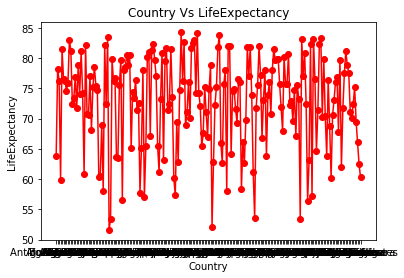

In [198]:
df = pd.DataFrame(co2_em_life_exp,columns=['Country','LifeExpectancy'])
plt.plot(co2_em_life_exp['Country'], co2_em_life_exp['LifeExpectancy'], color='red', marker='o')
plt.title('Country Vs LifeExpectancy')
plt.xlabel('Country')
plt.ylabel('LifeExpectancy')

## Data Cleaning 

In [47]:
ctsd_data

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225866,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Export,1206807424,NaN,No Quantity,NaN,all_commodities
8225867,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Re-Export,15943977,NaN,No Quantity,NaN,all_commodities
8225868,Zimbabwe,2000,TOTAL,ALL COMMODITIES,Export,1924962432,NaN,No Quantity,NaN,all_commodities
8225869,Zimbabwe,1995,TOTAL,ALL COMMODITIES,Import,2658853376,NaN,No Quantity,NaN,all_commodities


In [176]:
ctsd_data['category'].unique()

array(['01_live_animals', '02_meat_and_edible_meat_offal',
       '03_fish_crustaceans_molluscs_aquatic_invertebrates_ne',
       '04_dairy_products_eggs_honey_edible_animal_product_nes',
       '05_products_of_animal_origin_nes',
       '06_live_trees_plants_bulbs_roots_cut_flowers_etc',
       '07_edible_vegetables_and_certain_roots_and_tubers',
       '08_edible_fruit_nuts_peel_of_citrus_fruit_melons',
       '09_coffee_tea_mate_and_spices', '10_cereals',
       '11_milling_products_malt_starches_inulin_wheat_glute',
       '12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne',
       '13_lac_gums_resins_vegetable_saps_and_extracts_nes',
       '14_vegetable_plaiting_materials_vegetable_products_nes',
       '15_animal_vegetable_fats_and_oils_cleavage_products_et',
       '16_meat_fish_and_seafood_food_preparations_nes',
       '17_sugars_and_sugar_confectionery',
       '18_cocoa_and_cocoa_preparations',
       '19_cereal_flour_starch_milk_preparations_and_products',
       '20_vege

In [177]:
group_statistictics_country = ctsd_data.groupby(['country_or_area'])
group_statistictics_country

In [179]:
regions = group_statistictics_country.get_group('Afghanistan')
regions

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
56580,Afghanistan,2011,20450,"Goat meat, fresh, chilled or frozen",Import,3441,1254.0,Weight in kilograms,1254.0,02_meat_and_edible_meat_offal
56581,Afghanistan,2008,20210,"Bovine carcasses and half carcasses, frozen",Import,6849,1.0,Weight in kilograms,1.0,02_meat_and_edible_meat_offal
...,...,...,...,...,...,...,...,...,...,...
8216699,Afghanistan,2010,TOTAL,ALL COMMODITIES,Export,388483635,NaN,No Quantity,NaN,all_commodities
8216700,Afghanistan,2009,TOTAL,ALL COMMODITIES,Import,3336434781,NaN,No Quantity,NaN,all_commodities
8216701,Afghanistan,2009,TOTAL,ALL COMMODITIES,Export,403441006,NaN,No Quantity,NaN,all_commodities
8216702,Afghanistan,2008,TOTAL,ALL COMMODITIES,Import,3019860129,NaN,No Quantity,NaN,all_commodities


In [181]:
country_export_data = ctsd_data[(ctsd_data['flow']=='Export')]
country_import_data = ctsd_data[(ctsd_data['flow']=='Import')]

In [182]:
country_export_data

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals
10,Albania,2016,10600,"Animals, live, except farm animals",Export,584025,59521.0,Number of items,59521.0,01_live_animals
18,Albania,2015,10600,"Animals, live, except farm animals",Export,636184,80774.0,Number of items,80694.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225861,Zimbabwe,2004,TOTAL,ALL COMMODITIES,Export,1926065962,NaN,No Quantity,NaN,all_commodities
8225863,Zimbabwe,2002,TOTAL,ALL COMMODITIES,Export,2327365632,NaN,No Quantity,NaN,all_commodities
8225866,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Export,1206807424,NaN,No Quantity,NaN,all_commodities
8225868,Zimbabwe,2000,TOTAL,ALL COMMODITIES,Export,1924962432,NaN,No Quantity,NaN,all_commodities


In [183]:
country_import_data

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
...,...,...,...,...,...,...,...,...,...,...
8225858,Zimbabwe,2005,TOTAL,ALL COMMODITIES,Import,2072259499,NaN,No Quantity,NaN,all_commodities
8225860,Zimbabwe,2004,TOTAL,ALL COMMODITIES,Import,2203775543,NaN,No Quantity,NaN,all_commodities
8225862,Zimbabwe,2002,TOTAL,ALL COMMODITIES,Import,2466734080,NaN,No Quantity,NaN,all_commodities
8225865,Zimbabwe,2001,TOTAL,ALL COMMODITIES,Import,1714920192,NaN,No Quantity,NaN,all_commodities


In [185]:
total_exports_by_year = country_export_data.groupby(['year']).agg({'trade_usd':'sum', 'quantity':'sum'})
total_imports_by_year = country_import_data.groupby(['year']).agg({'trade_usd':'sum', 'quantity':'sum'})

In [199]:
total_exports_by_year.head()

,trade_usd,quantity
year,,
1988,959714235018,5.302506e+11
1989,1568456008524,3.854867e+13
1990,1796683137522,3.566221e+13
1991,2431981950377,4.666525e+13
1992,3153534720806,3.018419e+12


In [200]:
total_imports_by_year.head()

,trade_usd,quantity
year,,
1988,957662048714,1.122450e+12
1989,1549888748267,1.580507e+12
1990,1861500774854,1.604615e+12
1991,2536746744063,2.082078e+12
1992,3171543309360,2.443614e+12


In [190]:
total_exports_by_year['trade_usd'].hvplot.line(height=500, width=1200) * total_imports_by_year['trade_usd'].hvplot.line(height=500, width=1200)

:Overlay
   .Curve.Trade_usd.I  :Curve   [year]   (trade_usd)
   .Curve.Trade_usd.II :Curve   [year]   (trade_usd)

In [191]:
total_exports_by_category = country_export_data.groupby(['category']).agg({'trade_usd':'sum', 'quantity':'sum'})
total_imports_by_category = country_import_data.groupby(['category']).agg({'trade_usd':'sum', 'quantity':'sum'})

In [192]:
total_exports_by_category.iloc[:-1]['trade_usd'].hvplot.bar(rot=90, height=600, width=1200) + total_imports_by_category.iloc[:-1]['trade_usd'].hvplot.bar(rot=90, height=600, width=1200)

:Layout
   .Bars.Trade_usd.I  :Bars   [category]   (trade_usd)
   .Bars.Trade_usd.II :Bars   [category]   (trade_usd)

In [ ]:
# the exportation and importation of mineral, fuels, oil and distilations products are the largets sub industries across the globe

In [204]:
#These countries are majorly involved in this sub industry which contributes to the most co2 emmissions globally
country_and_sub_industries = ctsd_data[(ctsd_data['category']=='27_mineral_fuels_oils_distillation_products_etc')]
country_and_sub_industries

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2195092,Afghanistan,2016,270300,Peat (including peat litter),Import,598169115,1.064100e+09,Weight in kilograms,1.064100e+09,27_mineral_fuels_oils_distillation_products_etc
2195093,Afghanistan,2016,270400,"Coke, semi-coke of coal, lignite, peat & retor...",Import,96629074,1.279922e+08,Weight in kilograms,1.279922e+08,27_mineral_fuels_oils_distillation_products_etc
2195094,Afghanistan,2016,270500,"Coal gas, water gas, etc. (not gaseous hydroca...",Import,16892134,2.395592e+07,Weight in kilograms,2.395592e+07,27_mineral_fuels_oils_distillation_products_etc
2195095,Afghanistan,2016,271121,Natural gas in gaseous state,Import,296391545,7.409789e+08,Weight in kilograms,7.409789e+08,27_mineral_fuels_oils_distillation_products_etc
2195096,Afghanistan,2015,270119,"Coal except anthracite or bituminous, not aggl...",Export,19716077,4.246002e+08,Weight in kilograms,4.246002e+08,27_mineral_fuels_oils_distillation_products_etc
...,...,...,...,...,...,...,...,...,...,...
2295087,Mexico,1997,270112,"Bituminous coal, not agglomerated",Export,5308,3.210620e+05,Weight in kilograms,3.210620e+05,27_mineral_fuels_oils_distillation_products_etc
2295088,Mexico,1997,270119,"Coal except anthracite or bituminous, not aggl...",Import,36022,1.833900e+04,Weight in kilograms,1.833900e+04,27_mineral_fuels_oils_distillation_products_etc
2295089,Mexico,1997,270120,"Coal briquettes, ovoids, similar made solid fuels",Import,14150466,4.019356e+07,Weight in kilograms,4.019356e+07,27_mineral_fuels_oils_distillation_products_etc
2295090,Mexico,1997,270210,"Lignite, not agglomerated",Export,399,0.000000e+00,No Quantity,0.000000e+00,27_mineral_fuels_oils_distillation_products_etc


In [218]:
country_and_sub_industries['country_or_area'].nunique()
# 122 countries contribute are involved in this sub industry

122

In [220]:
total_trade_by_country = country_and_sub_industries.groupby(['country_or_area']).agg({'trade_usd':'sum'})

In [221]:
total_trade_by_country.iloc[:-1]['trade_usd'].hvplot.bar(rot=90, height=600, width=1200)

:Bars   [country_or_area]   (trade_usd)

In [214]:
country_and_sub_industries_import = ctsd_data[(ctsd_data['flow']=='Import')]
country_and_sub_industries_export = ctsd_data[(ctsd_data['flow']=='Export')]

In [216]:
country_and_sub_industries_import.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals


In [217]:
country_and_sub_industries_export.head()

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals
10,Albania,2016,10600,"Animals, live, except farm animals",Export,584025,59521.0,Number of items,59521.0,01_live_animals
18,Albania,2015,10600,"Animals, live, except farm animals",Export,636184,80774.0,Number of items,80694.0,01_live_animals


In [ ]:
 = country_and_sub_industries.groupby(['country_or_area']).agg({'trade_usd':'sum'})

In [48]:
emissions_data

,Country,Net energy imports % of energy use 1990,Net energy imports % of energy use 2015,GDP per unit of energy use 2011 PPP $ per kilogram of oil equivalent 1990,GDP per unit of energy use 2011 PPP $ per kilogram of oil equivalent 2015,Carbon dioxide emissions Total thousand metric tons 1990,Carbon dioxide emissions Total thousand metric tons 2014,Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 1990,Carbon dioxide emissions Carbon intensity kilograms per kilograms of oil equivalent energy use 2014,Carbon dioxide emissions per capita metric tons 1990,Carbon dioxide emissions per capita metric tons 2014,Carbon dioxide emissions kilograms per 2011 PPP $ of GDP 1990,Carbon dioxide emissions kilograms per 2011 PPP $ of GDP 2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,0.3,NaN,0.2
1,Albania,8.0,14.0,5.5,13.2,NaN,NaN,2.1,2.4,1.7,2.0,0.4,0.2
2,Algeria,-351.0,-177.0,12.0,10.2,NaN,NaN,3.5,2.8,3.0,3.7,0.3,0.3
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,407.0,462.0,NaN,NaN,7.5,5.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,0.1
211,"Yemen, Rep.",-273.0,-121.0,16.0,12.0,NaN,NaN,3.8,3.1,0.8,0.9,0.2,0.2
212,Zambia,9.0,8.0,3.4,5.6,NaN,NaN,0.4,0.4,0.3,0.3,0.1,0.1


In [52]:
global_land_temp_city

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [53]:
global_land_temp_country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [54]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [55]:
greenhouse_gas_em

,Country,Total greenhouse gas emissions thousand metric tons of carbon dioxide equivalent 2012,Total greenhouse gas emissions % change 1990-2012,Methane emissions thousand metric tons of carbon dioxide equivalent 2012,Methane emissions % change 1990-2012,Methane emissions From energy processes % of total 2008,Methane emissions Agricultural % of total 2008,Nitrous oxide emissions thousand metric tons of carbon dioxide equivalent 2012,Nitrous oxide emissions % change 1990-2012,Nitrous oxide emissions From energy processes % of total 2008,Nitrous oxide emissions Agricultural % of total 2008,Other greenhouse gas emissions thousand metric tons of carbon dioxide equivalent 2012,Other greenhouse gas emissions % change 1990-2012
0,Afghanistan,NaN,43.5,NaN,80.4,8.2,62.7,NaN,24.6,6.0,71.3,NaN,118.1
1,Albania,NaN,-19.9,NaN,3.8,25.8,65.0,NaN,-26.5,6.2,80.6,900.0,-75.0
2,Algeria,NaN,65.8,NaN,50.2,79.4,10.0,NaN,49.9,7.2,53.9,NaN,202.7
3,American Samoa,58.8,188.3,13.0,48.3,0.0,24.8,24.0,NaN,0.0,99.2,0.0,433.3
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),61.5,35.8,47.0,39.5,0.0,7.2,13.0,37.2,0.0,93.1,0.0,NaN
210,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,"Yemen, Rep.",NaN,218.5,NaN,128.5,27.8,46.8,NaN,77.4,13.7,71.0,NaN,433.3
212,Zambia,NaN,52.8,NaN,-77.5,40.3,38.3,NaN,-76.0,2.7,65.6,NaN,112.2


In [56]:
health_risk_factors

,Country,Prevalence of smoking Male % of adults 2016,Prevalence of smoking female % of adults 2016,"Incidence of tuberculosis per 100,000 people 2018",Prevalence of diabetes % of population ages 20 to 79 2019,"Incidence of HIV Total per 1,000 uninfected population ages 15-49 2018",Prevalence of HIV Total % of population ages 15-49 2018,Prevalence of HIV Women's share of population ages 15+ living with HIV % 2018,"Prevalence of HIV Youth, Male % of population ages 15-24 2018","Prevalence of HIV Youth, Female % of population ages 15-24 2018",Antiretroviral therapy coverage % of people living with HIV 2018,"Cause of death Communicable diseases and maternal, prenatal, and nutrition conditions % of population 2016",Cause of death Non-communicable diseases % of population 2016,Cause of death Injuries % of population 2016
0,Afghanistan,NaN,NaN,189.0,9.2,0.04,0.1,29.0,0.1,0.1,13.0,36.0,44.0,20.0
1,Albania,51.0,7.0,18.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,93.0,4.0
2,Algeria,30.0,1.0,69.0,6.7,0.05,0.1,46.0,0.1,0.1,81.0,15.0,76.0,10.0
3,American Samoa,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,38.0,29.0,3.0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,West Bank and Gaza,NaN,NaN,1.0,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,"Yemen, Rep.",29.0,8.0,48.0,5.4,0.07,0.1,22.0,0.1,0.1,21.0,29.0,57.0,15.0
212,Zambia,25.0,3.0,346.0,4.5,5.67,11.3,59.0,2.4,5.0,78.0,61.0,29.0,10.0


In [58]:
sustainability

,Country,People using safely managed drinking water services % of population 2017,People using safely managed sanitation services % of population 2017,Access to electricity % of population 2017,Renewable energy consumption % of total final energy consumption 2015,Expenditures for R&D % of GDP 2015,Urban population living in slums % of urban population 2014,Ambient PM2.5 air pollution mean annual exposure micrograms per cubic meter 2016,Adjusted net savings % of GNI 2017,Carbon dioxide emissions per capita metric tons 2014,Nationally protected terrestrial and marine areas % of total territorial area 2018,"Intentional homicides Combined source estimates per 100,000 people 2015",Internet use Individuals using the Internet % of population 2017
0,Afghanistan,NaN,NaN,97.7,18.4,NaN,62.7,56.3,2.7,0.3,0.1,10.0,13.5
1,Albania,70.0,39.9,100.0,38.6,NaN,NaN,18.2,8.2,2.0,13.5,2.8,71.8
2,Algeria,NaN,17.7,100.0,0.1,0.5,NaN,39.9,21.2,3.7,7.1,1.4,47.7
3,American Samoa,12.6,NaN,NaN,0.9,NaN,NaN,12.4,NaN,NaN,8.7,7.2,NaN
4,Andorra,90.6,100.0,100.0,19.7,NaN,NaN,10.3,NaN,5.8,26.7,0.0,91.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Virgin Islands (U.S.),NaN,NaN,100.0,3.9,NaN,NaN,10.3,NaN,NaN,1.0,49.3,64.4
210,West Bank and Gaza,NaN,61.2,100.0,10.5,0.5,NaN,32.7,NaN,0.6,NaN,1.0,65.2
211,"Yemen, Rep.",NaN,NaN,79.2,2.3,NaN,60.8,50.1,NaN,0.9,0.6,6.7,26.7
212,Zambia,NaN,NaN,40.3,88.0,NaN,54.0,27.4,9.2,0.3,37.9,5.3,27.9
